In [1105]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [1106]:
data_dir = "../data"

In [1107]:
dfs = [
    ("GPT2 Truthful", pd.read_pickle(f"{data_dir}/results_718028_gpt2_truthful.pkl")),
    (
        "Llama-AWQ Truthful",
        pd.read_pickle(f"{data_dir}/results_718535_llama-awq_truthful.pkl"),
    ),
    (
        "Llama-AWQ Trivia",
        pd.read_pickle(f"{data_dir}/results_718695_llama-awq_trivia.pkl"),
    ),
    (
        "Llama-3.1-8b-4bit Truthful",
        pd.read_pickle(f"{data_dir}/results_718860_llama-3.1-8b_4bit_truthful.pkl"),
    ),
    (
        "Llama-3.1-8b-4bit Trivia",
        pd.read_pickle(f"{data_dir}/results_718862_llama-3.1-8b_4bit_trivia.pkl"),
    ),
    (
        "Phi4-4bit Truthful",
        pd.read_pickle(f"{data_dir}/results_719053_phi4_4bit_truthful.pkl"),
    ),
]

In [1108]:
# df[df["completion_length"] == 0]

In [1109]:
def normalized_rephrases_gradients(row):
    grads = row["rephrased_gradients"]
    rephrase_lengths = row["rephrased_completion_lengths"]
    return [g / l if l else 0 for g, l in zip(grads, rephrase_lengths)]


for _, df in dfs:
    df["completion_gradient_normalized"] = df.apply(
        lambda row: (
            row["completion_gradient"] / row["completion_length"]
            if row["completion_length"] > 0
            else 0
        ),
        axis=1,
    )
    df["rephrased_gradient_mean"] = df["rephrased_gradients"].apply(
        lambda x: np.mean(x)
    )

    df["rephrased_gradient_normalized_mean"] = df.apply(
        lambda row: np.mean(normalized_rephrases_gradients(row)), axis=1
    )

    df["log_completion_gradient"] = df["completion_gradient"].apply(
        lambda x: np.log(x) if x > 0 else 0
    )
    df["log_rephrased_gradient_mean"] = df["rephrased_gradient_mean"].apply(
        lambda x: np.log(x) if x > 0 else 0
    )
    df["log_rephrased_gradient_std"] = df["rephrased_gradient_std"].apply(
        lambda x: np.log(x) if x > 0 else 0
    )

    bins = 25

    df["completion_gradient_bins"] = pd.cut(
        df["completion_gradient"], bins=bins, labels=False
    )
    df["rephrased_gradient_mean_bins"] = pd.cut(
        df["rephrased_gradient_mean"], bins=bins, labels=False
    )

    df["rephrased_gradient_std"] = df["rephrased_gradient_std"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["rephrased_gradient_std_bins"] = pd.cut(
        df["rephrased_gradient_std"], bins=bins, labels=False
    )

    df["completion_gradient_normalized_bins"] = pd.cut(
        df["completion_gradient_normalized"], bins=bins, labels=False
    )
    df["rephrased_gradient_normalized_mean_bins"] = pd.cut(
        df["rephrased_gradient_normalized_mean"], bins=bins, labels=False
    )

    df["log_completion_gradient_bins"] = pd.cut(
        df["log_completion_gradient"], bins=bins, labels=False
    )
    df["log_rephrased_gradient_mean_bins"] = pd.cut(
        df["log_rephrased_gradient_mean"], bins=bins, labels=False
    )

    df["log_rephrased_gradient_std"] = df["log_rephrased_gradient_std"].replace(
        [np.inf, -np.inf], np.nan
    )
    df["log_rephrased_gradient_std_bins"] = pd.cut(
        df["log_rephrased_gradient_std"], bins=bins, labels=False
    )

In [1110]:
for _, df in dfs:
    print(sum(df["evaluation"]) / len(df))

0.06487148102815178
0.29534313725490197
0.6171521848317428
0.1597051597051597
0.5488278801554469
0.4588957055214724


/Users/nilsgrunefeld/Documents/GitHub/gradient-uncertainty/env/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


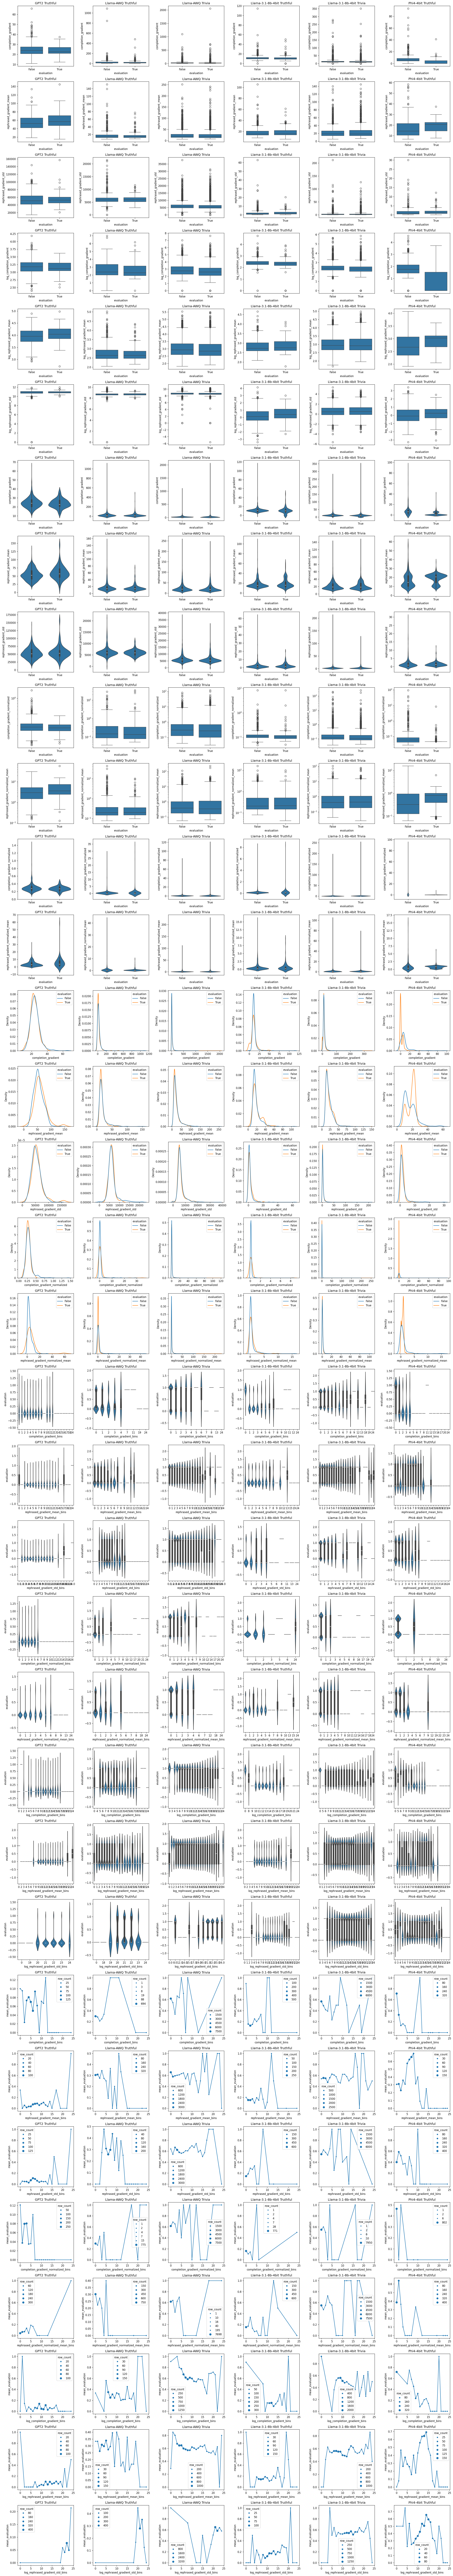

In [1111]:
plt.rcParams["figure.dpi"] = 120
plot_size = 4

plt_width = len(dfs)
plt_height = 34

fig, axs = plt.subplots(
    plt_height,
    plt_width,
    figsize=(plt_width * plot_size, plt_height * plot_size),
    squeeze=False,
)

for i, (name, df) in enumerate(dfs):
    j = 0

    sns.boxplot(data=df, x="evaluation", y="completion_gradient", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="evaluation", y="log_completion_gradient", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="evaluation", y="log_rephrased_gradient_mean", ax=axs[j][i])
    j += 1

    sns.boxplot(data=df, x="evaluation", y="log_rephrased_gradient_std", ax=axs[j][i])
    j += 1

    sns.violinplot(data=df, x="evaluation", y="completion_gradient", ax=axs[j][i])
    j += 1

    sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_mean", ax=axs[j][i])
    j += 1

    sns.violinplot(data=df, x="evaluation", y="rephrased_gradient_std", ax=axs[j][i])
    j += 1

    sns.boxplot(
        data=df,
        x="evaluation",
        y="completion_gradient_normalized",
        ax=axs[j][i],
        log_scale=True,
    )
    j += 1

    sns.boxplot(
        data=df,
        x="evaluation",
        y="rephrased_gradient_normalized_mean",
        ax=axs[j][i],
        log_scale=True,
    )
    j += 1

    sns.violinplot(
        data=df, x="evaluation", y="completion_gradient_normalized", ax=axs[j][i]
    )
    j += 1

    sns.violinplot(
        data=df, x="evaluation", y="rephrased_gradient_normalized_mean", ax=axs[j][i]
    )
    j += 1

    sns.kdeplot(
        data=df,
        x="completion_gradient",
        hue="evaluation",
        common_norm=False,
        ax=axs[j][i],
    )
    j += 1

    sns.kdeplot(
        data=df,
        x="rephrased_gradient_mean",
        hue="evaluation",
        common_norm=False,
        ax=axs[j][i],
    )
    j += 1

    sns.kdeplot(
        data=df,
        x="rephrased_gradient_std",
        hue="evaluation",
        common_norm=False,
        ax=axs[j][i],
    )
    j += 1

    sns.kdeplot(
        data=df,
        x="completion_gradient_normalized",
        hue="evaluation",
        common_norm=False,
        ax=axs[j][i],
    )
    j += 1

    sns.kdeplot(
        data=df,
        x="rephrased_gradient_normalized_mean",
        hue="evaluation",
        common_norm=False,
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="completion_gradient_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="rephrased_gradient_mean_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="rephrased_gradient_std_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="completion_gradient_normalized_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="rephrased_gradient_normalized_mean_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="log_completion_gradient_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="log_rephrased_gradient_mean_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.violinplot(
        data=df,
        x="log_rephrased_gradient_std_bins",
        y="evaluation",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("completion_gradient_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="completion_gradient_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("completion_gradient_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="completion_gradient_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("rephrased_gradient_mean_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="rephrased_gradient_mean_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("rephrased_gradient_mean_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="rephrased_gradient_mean_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("rephrased_gradient_std_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="rephrased_gradient_std_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("rephrased_gradient_std_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="rephrased_gradient_std_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("completion_gradient_normalized_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="completion_gradient_normalized_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("completion_gradient_normalized_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="completion_gradient_normalized_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("rephrased_gradient_normalized_mean_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="rephrased_gradient_normalized_mean_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("rephrased_gradient_normalized_mean_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="rephrased_gradient_normalized_mean_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("log_completion_gradient_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="log_completion_gradient_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("log_completion_gradient_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="log_completion_gradient_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("log_rephrased_gradient_mean_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="log_rephrased_gradient_mean_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("log_rephrased_gradient_mean_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="log_rephrased_gradient_mean_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )
    j += 1

    sns.lineplot(
        data=df.groupby("log_rephrased_gradient_std_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="log_rephrased_gradient_std_bins",
        y="mean_evaluation",
        ax=axs[j][i],
    )
    sns.scatterplot(
        data=df.groupby("log_rephrased_gradient_std_bins").agg(
            mean_evaluation=("evaluation", "mean"), row_count=("evaluation", "size")
        ),
        x="log_rephrased_gradient_std_bins",
        y="mean_evaluation",
        size="row_count",
        ax=axs[j][i],
    )

    for ax in axs.T[i]:
        ax.set_title(name)


plt.tight_layout()

In [1112]:
for name, df in dfs:
    true_gradients = df[df["evaluation"] == True]["completion_gradient"]
    false_gradients = df[df["evaluation"] == False]["completion_gradient"]

    t_stat, p_value = ttest_ind(true_gradients, false_gradients, equal_var=False)

    print(f"{name:<30} T-statistic: {t_stat:>12.4f}, P-value: {p_value}")

GPT2 Truthful                  T-statistic:      -1.0153, P-value: 0.3138785319832629
Llama-AWQ Truthful             T-statistic:      -0.6723, P-value: 0.5016268827460724
Llama-AWQ Trivia               T-statistic:      -3.3240, P-value: 0.0008918973066851153
Llama-3.1-8b-4bit Truthful     T-statistic:      -1.4294, P-value: 0.1548074487995216
Llama-3.1-8b-4bit Trivia       T-statistic:      -8.7735, P-value: 2.1341531038476213e-18
Phi4-4bit Truthful             T-statistic:     -11.3478, P-value: 3.988183281101431e-27


In [1113]:
for name, df in dfs:
    true_gradients = df[df["evaluation"] == True]["completion_gradient_normalized"]
    false_gradients = df[df["evaluation"] == False]["completion_gradient_normalized"]

    t_stat, p_value = ttest_ind(true_gradients, false_gradients, equal_var=False)

    print(f"{name:<30} T-statistic: {t_stat:>12.4f}, P-value: {p_value}")

GPT2 Truthful                  T-statistic:      -2.3284, P-value: 0.022590045675343316
Llama-AWQ Truthful             T-statistic:       0.5333, P-value: 0.5942262223359223
Llama-AWQ Trivia               T-statistic:       0.2747, P-value: 0.7835313853269634
Llama-3.1-8b-4bit Truthful     T-statistic:       0.5248, P-value: 0.600532477941395
Llama-3.1-8b-4bit Trivia       T-statistic:      -1.2529, P-value: 0.21027755502503367
Phi4-4bit Truthful             T-statistic:      -2.6518, P-value: 0.008290875189148087
